In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta, date
import matplotlib.ticker as mtick
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [53]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True) 
df['DOB'] =pd.to_datetime(df['DOB'].str[:-2] + '19' + df['DOB'].str[-2:])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

odp. Większoś menagerów ocenia w bardzo podobny sposób wystawiajac głównie ocenę'Fully Meets'.
Na tym tle wyróżnia się Brannon Miller, który wystawia bardzo zróżnicowane oceny. Ocenę 'Fully Meets' wystawił jednynie ponad 40% pracownikom, jednocześnie wystawiając ocenę 'Exceeds' ponad 30%. Częściej wystawia róznież ocenę "PIP" - blisko 20%.
Należy też zwrócic uwagę na Board of Director, Brandon R. LeBlanck i Brian Champaigne, którzy wystawiają tylko ocenę 'Fully Meets'.
7 na 21 managerów wystawia oceny 'PIP' - najwięcej Branon Miller i John Smith.
Najwięcej ocen 'Needs Iprovement' wystawia Debra Houlihan., co wyróżnia ją na tle innych managerów.

Z analizy wykluczona została kolumna "ManagerID" ze względu na brak części danych, jak i przypisnie dwóm Managerom po dwa ID.

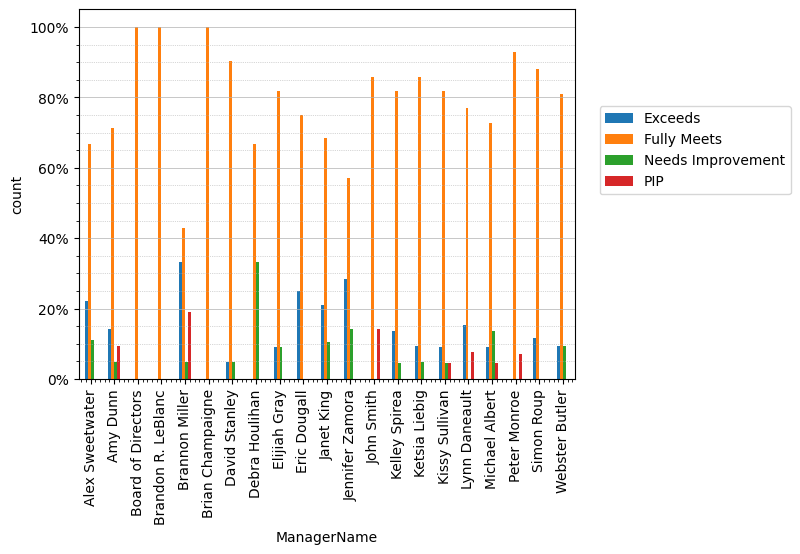

In [54]:
Manager_PerformanceScore=pd.crosstab(df['ManagerName'], df['PerformanceScore'],normalize='index')
ax = Manager_PerformanceScore.plot.bar()
ax.legend(loc=(1.05,0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('count')
ax.minorticks_on()
ax.grid(axis = 'y', which='major', linestyle='-', linewidth='0.5')
ax.grid(axis = 'y', which='minor', linestyle=':', linewidth='0.5')

Text(0, 0.5, 'count')

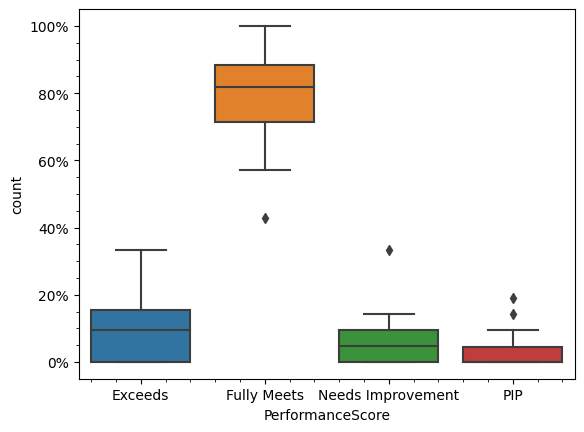

In [55]:
ax2=sns.boxplot(data=Manager_PerformanceScore)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.minorticks_on()
ax2.set_ylabel('count')

Błędne ID

In [56]:
df['ManagerName'].value_counts()
df.groupby(['ManagerName','ManagerID']).agg({'Employee_Name':'count'})

Employee_Name
ManagerName        ManagerID               
Alex Sweetwater    10.0                   9
Amy Dunn           11.0                  21
Board of Directors 9.0                    2
Brandon R. LeBlanc 1.0                    6
                   3.0                    1
Brannon Miller     12.0                  21
Brian Champaigne   13.0                   8
David Stanley      14.0                  21
Debra Houlihan     15.0                   3
Elijiah Gray       16.0                  22
Eric Dougall       6.0                    4
Janet King         2.0                   19
Jennifer Zamora    5.0                    7
John Smith         17.0                  14
Kelley Spirea      18.0                  22
Ketsia Liebig      19.0                  21
Kissy Sullivan     20.0                  22
Lynn Daneault      21.0                  13
Michael Albert     22.0                  21
                   30.0                   1
Peter Monroe       7.0                   14
Simon Roup         4.0                   17
Webster Butler     39.0                  13

Brak ID

In [57]:
df.loc[df['ManagerID'].isnull()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
210,"Becker, Scott",1.110030e+09,0.0,0.0,1.0,3.0,5.0,3.0,0.0,17.0,...,N/A - still employed,Leave of Absence,Production,Webster Butler,NaN,MBTA ads,Fully Meets,1.09,4.0,0.0
211,"Chang, Donovan E",1.111030e+09,0.0,0.0,1.0,1.0,5.0,3.0,0.0,22.0,...,N/A - still employed,Active,Production,Webster Butler,NaN,Newspager/Magazine,Fully Meets,3.80,5.0,0.0
220,"Rivera, Haley",1.405068e+09,1.0,1.0,0.0,1.0,5.0,4.0,0.0,22.0,...,N/A - still employed,Active,Production,Webster Butler,NaN,Search Engine - Google Bing Yahoo,Exceeds,4.36,5.0,0.0
221,"Sewkumar, Nori",8.070102e+08,0.0,0.0,0.0,3.0,5.0,3.0,0.0,15.2,...,N/A - still employed,Leave of Absence,Production,Webster Butler,NaN,Search Engine - Google Bing Yahoo,Fully Meets,5.00,5.0,0.0
275,"Buccheri, Joseph",1.101023e+09,0.0,0.0,1.0,1.0,5.0,3.0,0.0,22.0,...,N/A - still employed,Active,Production,Webster Butler,NaN,Word of Mouth,Fully Meets,3.19,3.0,0.0
276,"Fancett, Nicole",1.402065e+09,0.0,0.0,0.0,1.0,5.0,3.0,0.0,24.0,...,N/A - still employed,Active,Production,Webster Butler,NaN,Newspager/Magazine,Fully Meets,4.00,4.0,0.0
277,"Hutter, Rosalie",1.103025e+09,0.0,3.0,0.0,2.0,5.0,3.0,0.0,28.0,...,N/A - Has not started yet,Future Start,Production,Webster Butler,NaN,Other,Fully Meets,2.63,3.0,0.0
278,"Manchester, Robyn",1.110030e+09,1.0,1.0,0.0,2.0,5.0,3.0,0.0,23.0,...,N/A - Has not started yet,Future Start,Production,Webster Butler,NaN,Vendor Referral,Fully Meets,5.00,3.0,0.0


2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

odp. Najlepszym żródłem pozyskania pracowników, jeśli zależy nam na jak najdłuższym stażu pracy jest 'Other'

In [58]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<AxesSubplot: xlabel='count', ylabel='RecruitmentSource'>

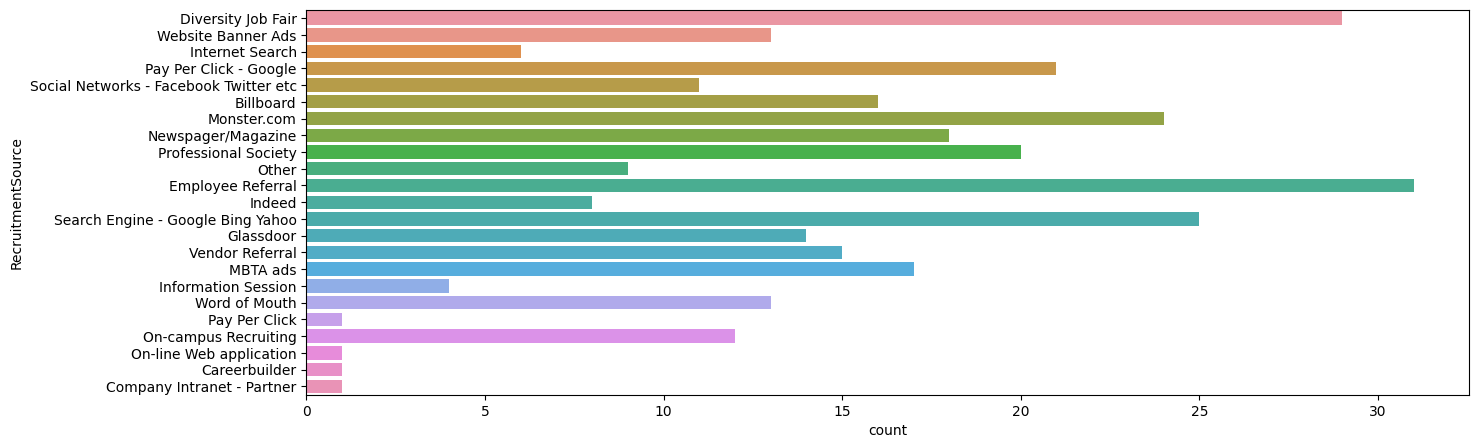

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(y='RecruitmentSource',data=df)

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

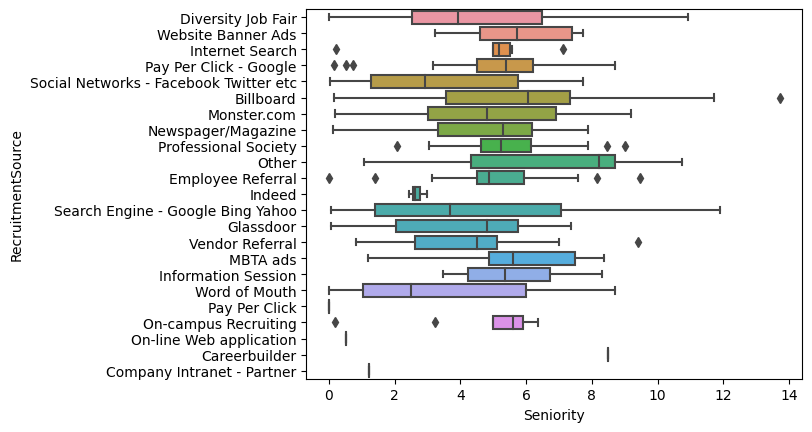

In [60]:
sns.boxplot(y='RecruitmentSource',x='Seniority',data=df)

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

Odp. 
-Najbardziej zadowoloną grupą pracowników są 'Widowed'. Ich oceny to wyłacznie 5 i 4. 
-Kolejna grupa to 'Divorced', gdzie udział ocen 4 i 5 jest równie znaczący.
-Grupa 'Separated' jest najbardziej żróżnicowana. Posiada również najwięcej skrajnych ocen. 

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

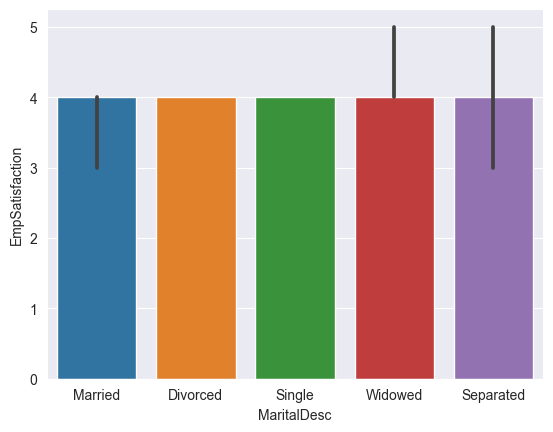

In [66]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df,estimator=np.median)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

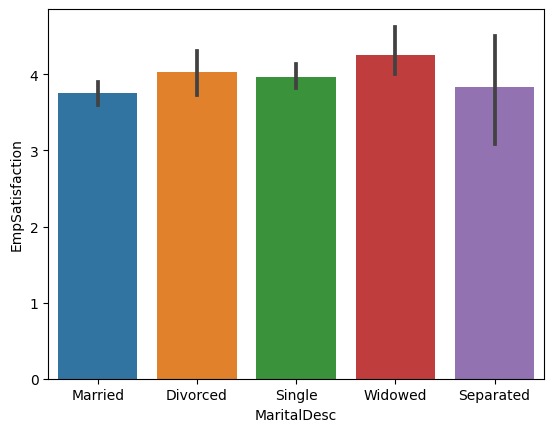

In [61]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

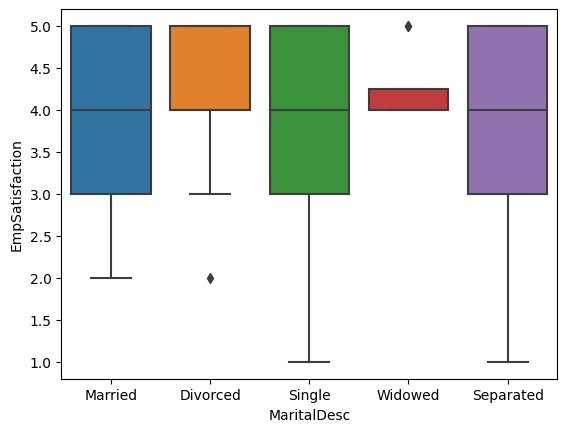

In [62]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

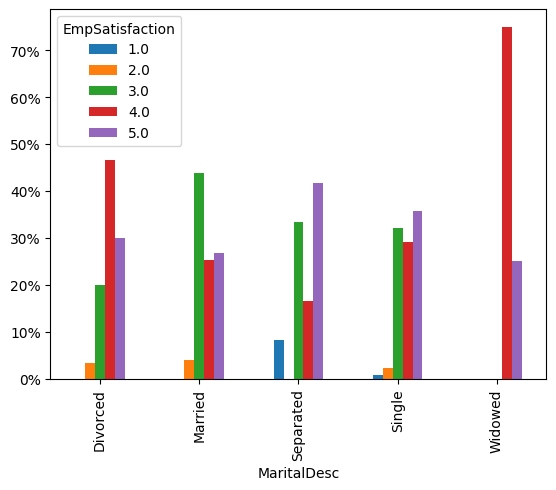

In [63]:
MaritalDesc_EmpSatisfaction=pd.crosstab(df['MaritalDesc'], df['EmpSatisfaction'],normalize='index')
ax3 = MaritalDesc_EmpSatisfaction.plot.bar()
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

<AxesSubplot: xlabel='Age', ylabel='Count'>

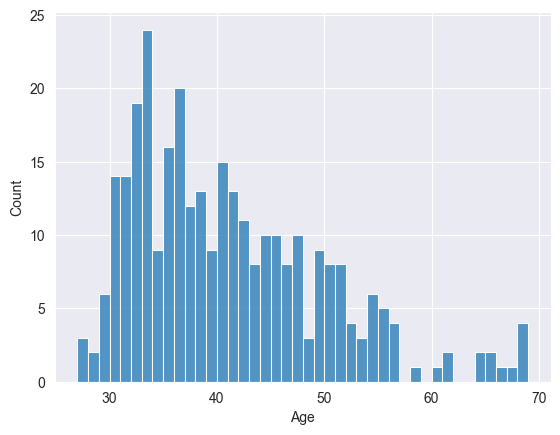

In [64]:
end_date = dt.datetime(2019,9,27)
def count_age(row):
    return ((end_date - row['DOB'])/np.timedelta64(1,'Y'))
df['Age'] = df.apply(lambda row: count_age(row),axis=1).round()
sns.set_style('darkgrid')
sns.histplot(df['Age'],binwidth=1)

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

odp. Młodsi pracownicy pracują nad większą ilością projektów niż starsi pracowniy.

<AxesSubplot: xlabel='Age', ylabel='SpecialProjectsCount'>

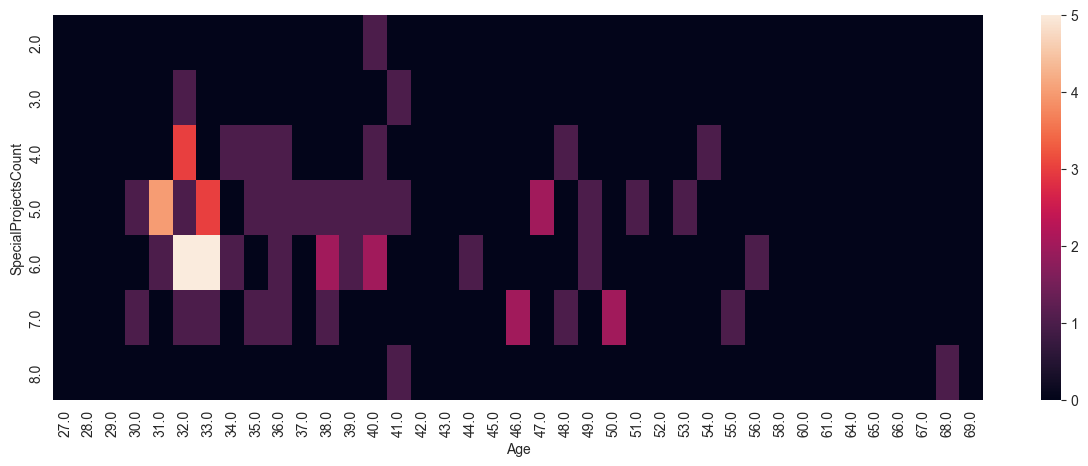

In [65]:
plt.figure(figsize=(15,5))
heat=(df.pivot_table(index=df['SpecialProjectsCount'],columns=df['Age'],values='EmpID',aggfunc='count').fillna(0))
sns.heatmap(heat[1:])